# 1. Introdução

Este notebook analisa dados de voos para identificar padrões de preços, horários, duração e rotas. Os dados são retirados do site Kaggle, do dataset [Airlines Flights Data](https://www.kaggle.com/datasets/rohitgrewal/airlines-flights-data).

## Objetivos da Análise

Pretendo, além de desenvolver e consolidar um pouco meus conhecimentos em Data Science, responder algumas perguntas para ampliar meu lado analítico, sendo estas:



1.   Qual a distribuição dos preços das passagens?
2.   Como o preço varia entre as classes (Executiva x Economy)?
3.   Existe relação entre a duração do voo e o preço da passagem?
4.   Como o preço varia de acordo com o horário do dia?
5.   Quais são as rotas mais caras e mais baratas?
6.   A compra com antecedência influencia o preço da passagem?



In [ ]:
import pandas as pd

# 2. Entendimento dos Dados (Exploração inicial)

In [ ]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/airlines_flights_data.csv')

Abaixo analiso o DataFame, verificando quantas colunas ele possui, qual o tipo de cada uma delas, além de verificar as primeiras 5 linhas para saber como os dados são apresentados e de qual os valores comuns, as médias, dentre outras informações básicas.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
df.head()

,index,airline,flight,source_city,departure_time,...,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,...,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,...,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,...,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,...,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,...,Mumbai,Economy,2.33,1,5955


In [6]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [7]:
df.describe(include='object')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


Após a verificação de comos os dados estão dispostos, verifico se existem valores vazios para tratá-los caso haja.

In [8]:
df.isnull().sum()

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


Com as análises iniciais feitas, altero o nome das colunas para Português para facilitar o entendimento dos dados e gráficos mais a frente, além de atualizar alguns para melhor legibilidade.

In [9]:
colunas_renomeadas = {
    'index': 'id',
    'airline': 'companhia_aerea',
    'flight': 'codigo_voo',
    'source_city': 'cidade_origem',
    'departure_time': 'horario_partida',
    'stops': 'escalas',
    'arrival_time': 'horario_chegada',
    'destination_city': 'cidade_destino',
    'class': 'classe',
    'duration': 'duracao',
    'days_left': 'dias_restantes',
    'price': 'preco',
}

df.rename(columns=colunas_renomeadas, inplace=True)
df.columns

Index(['id', 'companhia_aerea', 'codigo_voo', 'cidade_origem',
       'horario_partida', 'escalas', 'horario_chegada', 'cidade_destino',
       'classe', 'duracao', 'dias_restantes', 'preco'],
      dtype='object')

In [10]:
df['horario_partida'] = df['horario_partida'].replace({
    'Morning': 'Manhã',
    'Early_Morning': 'Início da Manhã',
    'Evening': 'Noite',
    'Night': 'Madrugada',
    'Afternoon': 'Tarde',
    'Late_Night': 'Final de Noite'
})

df['horario_partida'].value_counts()

,count
horario_partida,
Manhã,71146
Início da Manhã,66790
Noite,65102
Madrugada,48015
Tarde,47794
Final de Noite,1306


In [11]:
df['horario_chegada'] = df['horario_chegada'].replace({
    'Morning': 'Manhã',
    'Early_Morning': 'Início da Manhã',
    'Evening': 'Noite',
    'Night': 'Madrugada',
    'Afternoon': 'Tarde',
    'Late_Night': 'Final de Noite'
})

df['horario_chegada'].value_counts()

,count
horario_chegada,
Madrugada,91538
Noite,78323
Manhã,62735
Tarde,38139
Início da Manhã,15417
Final de Noite,14001


In [12]:
traducao_classe = {
    'Economy': 'Econômica',
    'Business': 'Executiva'
}

df['classe'] = df['classe'].replace(traducao_classe)
display(df['classe'].value_counts())

,count
classe,
Econômica,206666
Executiva,93487


In [13]:
traducao_stops = {
    'zero': 'Nenhuma escala',
    'one': 'Uma escala',
    'two_or_more': 'Duas ou mais escalas'
}

df['escalas'] = df['escalas'].replace(traducao_stops)
display(df['escalas'].value_counts())

,count
escalas,
Uma escala,250863
Nenhuma escala,36004
Duas ou mais escalas,13286


In [14]:
df['companhia_aerea'] = df['companhia_aerea'].replace({
    'Air_India': 'Air India',
    'GO_FIRST': 'Go First'
})

Abaixo serão criadas as colunas auxiliares, ou seja, colunas que não vieram junto do DataSet, que serão criadas para auxiliar na interpretação com gráficos.

In [15]:
stops_map = {
    'Nenhuma escala': 0,
    'Uma escala': 1,
    'Duas ou mais escalas': 2
}

In [16]:
df['escalas_num'] = df['escalas'].map(stops_map)

In [17]:
df['escalas_num'] = df['escalas_num'].astype('Int64')

In [18]:
df['escalas_num']

,escalas_num
0,0
1,0
2,0
3,0
4,0
...,...
300148,1
300149,1
300150,1
300151,1


In [19]:
df['duracao_arredondada'] = df['duracao'].round()
df['duracao_arredondada'].value_counts()

,count
duracao_arredondada,
2.0,22238
10.0,18943
12.0,18924
6.0,18776
8.0,18624
7.0,16430
14.0,16090
11.0,15272
9.0,14908


In [20]:
df['rota'] = df['cidade_origem'] + ' -> ' + df['cidade_destino']
df['rota'].unique()

array(['Delhi -> Mumbai', 'Delhi -> Bangalore', 'Delhi -> Kolkata',
       'Delhi -> Hyderabad', 'Delhi -> Chennai', 'Mumbai -> Delhi',
       'Mumbai -> Bangalore', 'Mumbai -> Kolkata', 'Mumbai -> Hyderabad',
       'Mumbai -> Chennai', 'Bangalore -> Delhi', 'Bangalore -> Mumbai',
       'Bangalore -> Kolkata', 'Bangalore -> Hyderabad',
       'Bangalore -> Chennai', 'Kolkata -> Delhi', 'Kolkata -> Mumbai',
       'Kolkata -> Bangalore', 'Kolkata -> Hyderabad',
       'Kolkata -> Chennai', 'Hyderabad -> Delhi', 'Hyderabad -> Mumbai',
       'Hyderabad -> Bangalore', 'Hyderabad -> Kolkata',
       'Hyderabad -> Chennai', 'Chennai -> Delhi', 'Chennai -> Mumbai',
       'Chennai -> Bangalore', 'Chennai -> Kolkata',
       'Chennai -> Hyderabad'], dtype=object)

A empresa aérea **Vistara** é a companhia com mais registros no dataset, seguida da **Air India** e, em terceiro, a **Indigo**

In [21]:
df['companhia_aerea'].value_counts()

,count
companhia_aerea,
Vistara,127859
Air India,80892
Indigo,43120
Go First,23173
AirAsia,16098
SpiceJet,9011


Como esperado, a classe **executiva** possui uma média de preço 9x mais alta do que a classe econômica, mas possui também uma variação de preço muito maior, indicando que talvez o valor por companhia aérea varie mais, ou que seja por conta de promoções.

In [22]:
df.groupby('classe')['preco'].mean()

,preco
classe,
Econômica,6572.342383
Executiva,52540.081124


In [23]:
df.groupby('classe')['preco'].agg(['mean', 'median', 'min', 'max', 'count', 'std'])

,mean,median,min,max,count,std
classe,,,,,,
Econômica,6572.342383,5772.0,1105,42349,206666,3743.519517
Executiva,52540.081124,53164.0,12000,123071,93487,12969.314606


O destino mais comum é **Mumbai**, com 59.097 voos, seguido de 57.360 aparições de **Delhi** e **Bangalore**, com 51.068

In [24]:
df['cidade_destino'].value_counts()

,count
cidade_destino,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


Nota-se que quanto mais próximo ao dia do voo, mais caro a passagem tende a ser.

In [25]:
df.groupby('dias_restantes')['preco'].mean().sort_values(ascending=False)

,preco
dias_restantes,
2,30211.299801
3,28976.083569
5,26679.773368
4,25730.905653
9,25726.246072
7,25588.367351
10,25572.819134
8,24895.883995
6,24856.493902


Nota-se que o DataFrame possui mais voos com alguma escala do que sem, o que impacta diretamente na duração média dos voos.

In [26]:
df.groupby('escalas')['duracao'].mean().sort_values(ascending=False)

,duracao
escalas,
Duas ou mais escalas,15.317141
Uma escala,13.496514
Nenhuma escala,2.191324


In [27]:
df.groupby('cidade_origem')['duracao'].agg(['mean', 'median', 'min', 'max', 'std']) # Dados da duração do voo com base nas cidades de origem

,mean,median,min,max,std
cidade_origem,,,,,
Bangalore,12.029203,11.42,0.83,47.75,6.966650
Chennai,12.838901,11.58,0.83,49.83,7.353063
Delhi,11.515499,10.25,1.92,39.67,7.336256
Hyderabad,12.268075,11.25,0.92,42.00,6.993185
Kolkata,13.249898,12.25,2.08,40.50,7.223163
Mumbai,11.888448,11.08,1.17,40.00,7.121188


In [28]:
df.groupby('cidade_destino')['duracao'].agg(['mean', 'median', 'min', 'max', 'std']) # Dados da duração do voo com base nas cidades de chegada

,mean,median,min,max,std
cidade_destino,,,,,
Bangalore,12.058039,10.92,0.83,49.83,7.005259
Chennai,13.338900,12.42,0.83,47.75,7.338479
Delhi,10.513310,9.50,1.83,41.58,6.605293
Hyderabad,13.381945,12.58,1.00,41.83,7.488314
Kolkata,13.214953,11.83,1.75,44.50,7.427698
Mumbai,11.583355,10.92,1.25,40.92,6.962312


Aqui verifica-se que a maioria dos voos ocorre no período da manhã, no seu início ou durante a noite.

In [29]:
df['horario_partida'].value_counts()

,count
horario_partida,
Manhã,71146
Início da Manhã,66790
Noite,65102
Madrugada,48015
Tarde,47794
Final de Noite,1306


# 3. Análises Exploratórias

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

## 3.1 Distribuição dos preços

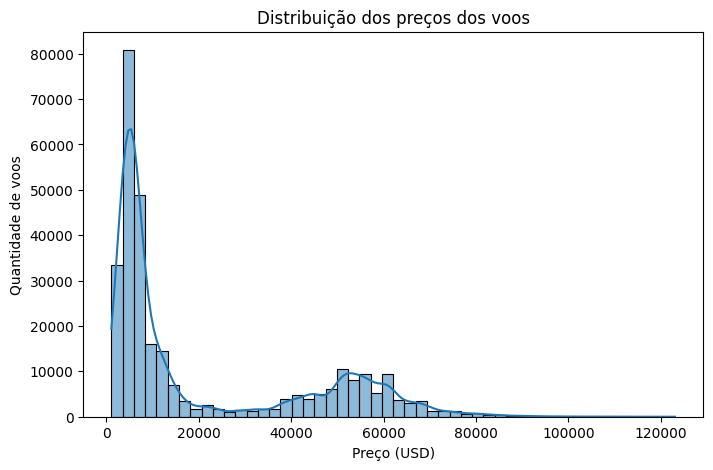

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='preco', bins=50, kde=True)
plt.title('Distribuição dos preços dos voos')
plt.xlabel('Preço (USD)')
plt.ylabel('Quantidade de voos')
plt.show()

É possível notar que a maioria dos voos são mais baratos, com dois picos de concentração, um em torno dos primeiros 20.000 USD e outro em torno de 40.000-70.000 USD. No entanto, o gráfico possui uma cauda longa à direita, o que é causado por outliers muito caros, que puxam o gráfico para aquele lado.

## 3.2 Preço por classe (Executiva x Econômica)

In [32]:
df.groupby('classe')['preco'].agg(['mean', 'median', 'min', 'max', 'count', 'std'])

,mean,median,min,max,count,std
classe,,,,,,
Econômica,6572.342383,5772.0,1105,42349,206666,3743.519517
Executiva,52540.081124,53164.0,12000,123071,93487,12969.314606


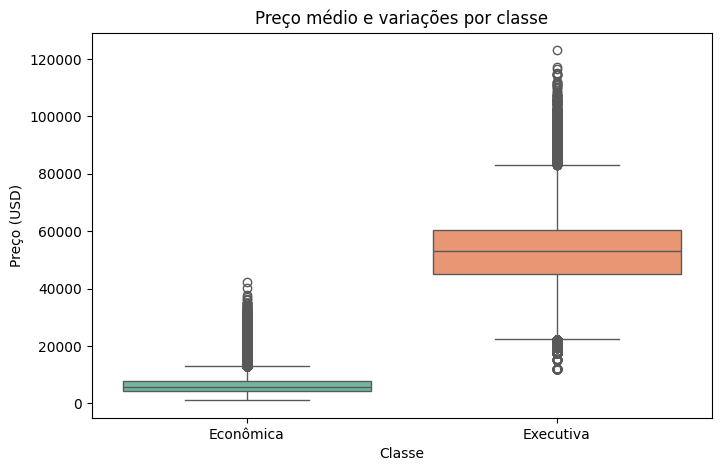

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='classe', y='preco', data=df, palette='Set2', hue='classe')
plt.title('Preço médio e variações por classe')
plt.xlabel('Classe')
plt.ylabel('Preço (USD)')
plt.show()

O gráfico mostra que as passagens de classe executiva são, aproximadamente, 9 vezes mais caras que as de classe econômica. Além disso, a dispersão dos valores é muito maior na executiva, indicando que há tanto bilhetes bem mais caros quanto promoções específicas. Isso sugere que a classe executiva está mais sujeita a variação de preços, possivelmente devido a menor oferta e à personalização do serviço.

## 3.3 Duração do voo x Preço

In [34]:
df_duracao_preco = df.groupby('duracao_arredondada')['preco'].mean().reset_index()
df_duracao_preco

,duracao_arredondada,preco
0,1.0,3232.265202
1,2.0,9420.952694
2,3.0,11584.400636
3,4.0,7113.145299
4,5.0,13353.175331
5,6.0,16009.599648
6,7.0,17246.684175
7,8.0,18688.566527
8,9.0,18464.714046
9,10.0,22045.380088


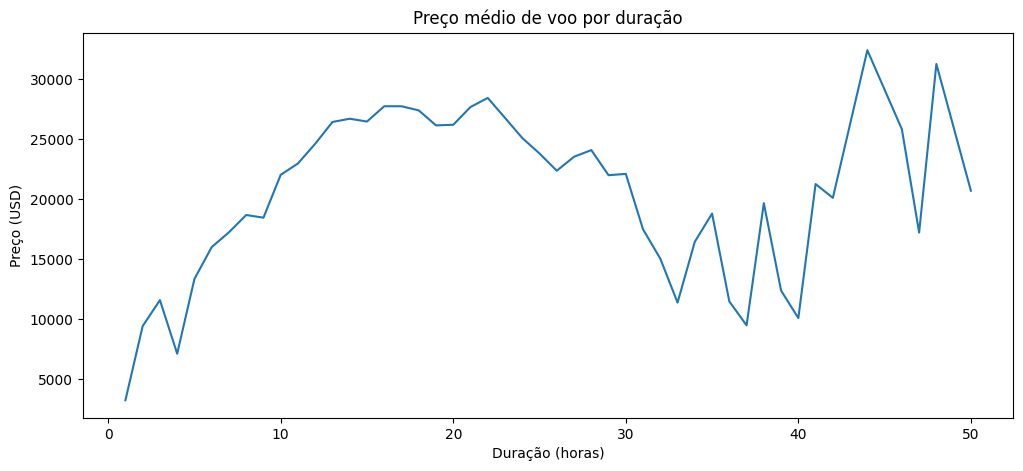

In [35]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='duracao_arredondada', y='preco', data=df_duracao_preco)
plt.title('Preço médio de voo por duração')
plt.xlabel('Duração (horas)')
plt.ylabel('Preço (USD)')
plt.show()

Agora verificamos que os voos mais longos possuem um preço mais alto em sua compra, no entanto, há exceções, pois alguns voos longos recebem promoção ou são mais baratos e isso faz ter algumas variações no gráfico. Isso pode estar envolvido com o fato de, como é uma rota mais longa, aquele avião precisa de mais combustível, ou que como é necessário uma parada, a empresa precisa arcar com alguns outros custos por conta do aeroporto, fazendo com que a passagem saia mais cara.

## 3.4 Preço por horário do dia

In [36]:
media_preco_por_hora_do_dia = df.groupby('horario_partida')['preco'].mean().sort_values(ascending=False).reset_index()
media_preco_por_hora_do_dia

,horario_partida,preco
0,Madrugada,23062.146808
1,Manhã,21630.760254
2,Noite,21232.361894
3,Início da Manhã,20370.676718
4,Tarde,18179.203331
5,Final de Noite,9295.299387


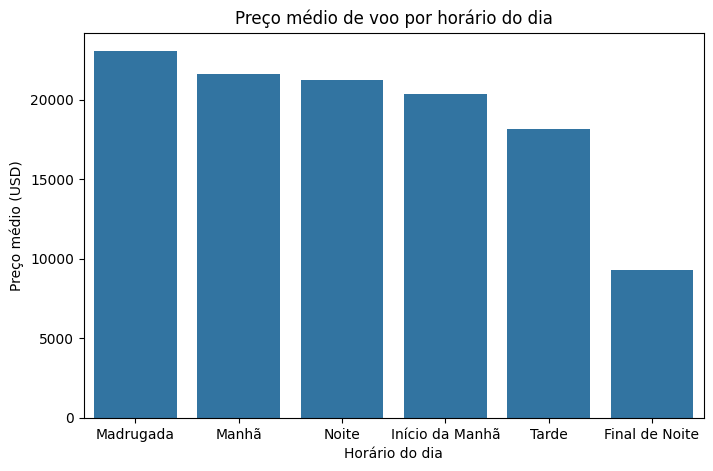

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(x='horario_partida', y='preco', data=media_preco_por_hora_do_dia)
plt.title('Preço médio de voo por horário do dia')
plt.xlabel('Horário do dia')
plt.ylabel('Preço médio (USD)')
plt.show()

A maioria dos voos se concentram em horários da manhã e da noite, e menor oferta a tarde e na madrugada. Por conta disso, esses horários tendem a ter voos com maior valor, o que é refletido nesse gráfico, mostrando que os voos na madrugada tem a maior média, por serem mais comuns entre turistas, logo eles aproveitam para aumentar o valor. O mesmo se passa no período da manhã e da noite, sendo o da manhã para corporativos que precisam de uma viagem para chegar no destino ainda no mesmo dia.

## 3.5 Top 5 rotas mais caras e mais baratas

In [38]:
media_preco_por_rota = df.groupby('rota')['preco'].mean().reset_index()

In [39]:
top5_rotas = media_preco_por_rota.nlargest(5, 'preco')
bottom5_rotas = media_preco_por_rota.nsmallest(5, 'preco')

In [40]:
top_bottom_rotas = pd.concat([top5_rotas, bottom5_rotas])

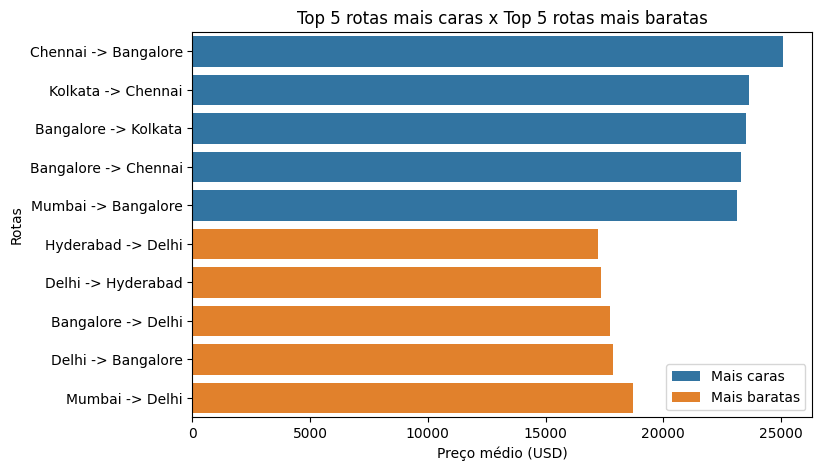

In [41]:
plt.figure(figsize=(8, 5))
sns.barplot(data=top_bottom_rotas, x='preco', y='rota', hue=['Mais caras' if p in top5_rotas['preco'].values else 'Mais baratas' for p in top_bottom_rotas['preco']])
plt.title('Top 5 rotas mais caras x Top 5 rotas mais baratas')
plt.xlabel('Preço médio (USD)')
plt.ylabel('Rotas')
plt.show()

Rotas como Mumbai -> Delhi aparecem com maior frequência nos dados do DataFrame e possuem preços médios competitivos devido à alta demanda e concorrência. Já rotas menos frequentes tendem a ter valores mais altos, isso ocorre pois rotas com grande volumes de passageiros permitem que as companhias aéreas mantenham preços mais baixos, para que os clientes continuem comprando ali.

In [42]:
media_duracao_por_rota = df.groupby('rota')['duracao'].mean().reset_index()

top5_duracao = media_duracao_por_rota.nlargest(5, 'duracao')
bottom5_duracao = media_duracao_por_rota.nsmallest(5, 'duracao')

top_bottom_duracao = pd.concat([top5_duracao, bottom5_duracao])

top_bottom_rotas

,rota,preco
5,Chennai -> Bangalore,25081.850454
21,Kolkata -> Chennai,23660.361040
3,Bangalore -> Kolkata,23500.061229
0,Bangalore -> Chennai,23321.850078
25,Mumbai -> Bangalore,23147.873807
17,Hyderabad -> Delhi,17243.945685
12,Delhi -> Hyderabad,17347.288379
1,Bangalore -> Delhi,17723.313972
10,Delhi -> Bangalore,17880.216315
27,Mumbai -> Delhi,18725.320008


## 3.6 Preço conforme antecedência da compra

In [43]:
df_grouped = df.groupby('dias_restantes')['preco'].mean().reset_index()

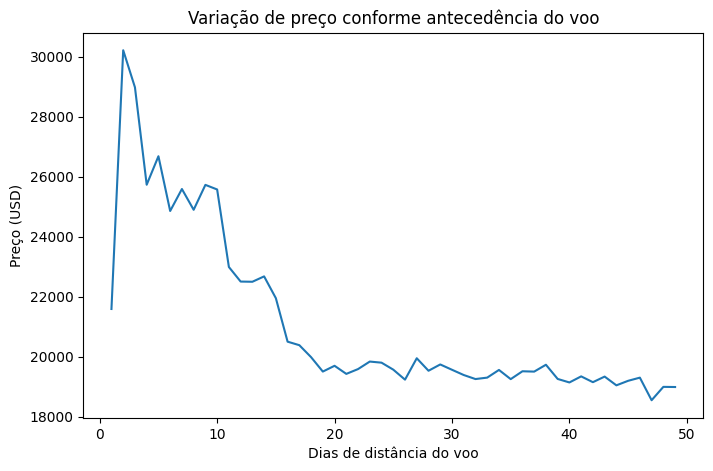

In [44]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='dias_restantes', y='preco', data=df_grouped)
plt.title('Variação de preço conforme antecedência do voo')
plt.xlabel('Dias de distância do voo')
plt.ylabel('Preço (USD)')
plt.show()

Observa-se que, quanto mais próximo a data do voo, mais cara aquela passagem fica. Esse aumento não é linear: nos últimos dias antes da viagem, há uma forte escalada nos preços, principalmente da classe executiva. Isso é comum no setor aéreo, pois as companhias tendem a ajustar as tarifas dinamicamente com base na demanda.

## 3.7 Outros gráficos que podem ser interessantes

### Números de voos por companhias aéreas

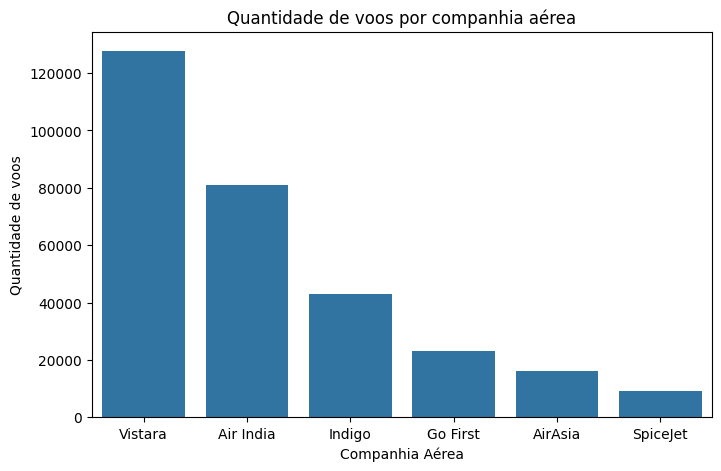

In [45]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['companhia_aerea'].value_counts().index, y=df['companhia_aerea'].value_counts().values)
plt.title('Quantidade de voos por companhia aérea')
plt.xlabel('Companhia Aérea')
plt.ylabel('Quantidade de voos')
plt.show()

### Gráfico de destinos mais comuns

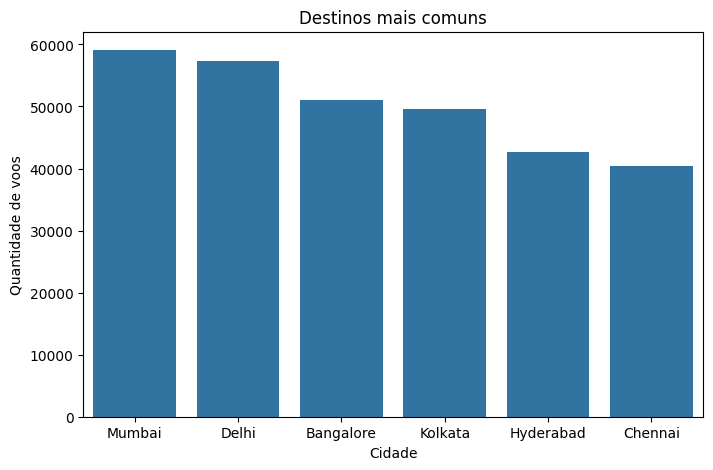

In [46]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['cidade_destino'].value_counts().index, y=df['cidade_destino'].value_counts().values)
plt.title('Destinos mais comuns')
plt.xlabel('Cidade')
plt.ylabel('Quantidade de voos')
plt.show()

### Gráfico da duração de voos conforme o número de escalas

In [48]:
df_time_stop = df.groupby('escalas')['duracao'].mean().sort_values(ascending=True).reset_index()
df_time_stop

,escalas,duracao
0,Nenhuma escala,2.191324
1,Uma escala,13.496514
2,Duas ou mais escalas,15.317141


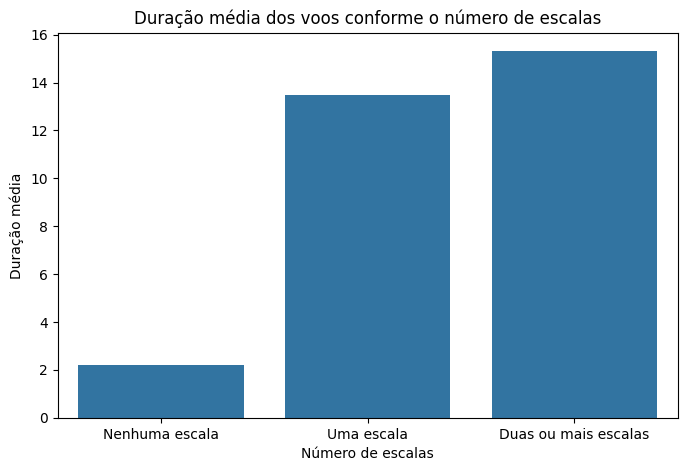

In [49]:
plt.figure(figsize=(8, 5))
sns.barplot(x='escalas', y='duracao', data=df_time_stop)
plt.title('Duração média dos voos conforme o número de escalas')
plt.xlabel('Número de escalas')
plt.ylabel('Duração média')
plt.show()

### Gráfico mostrandos os períodos do dia com maior números de voo

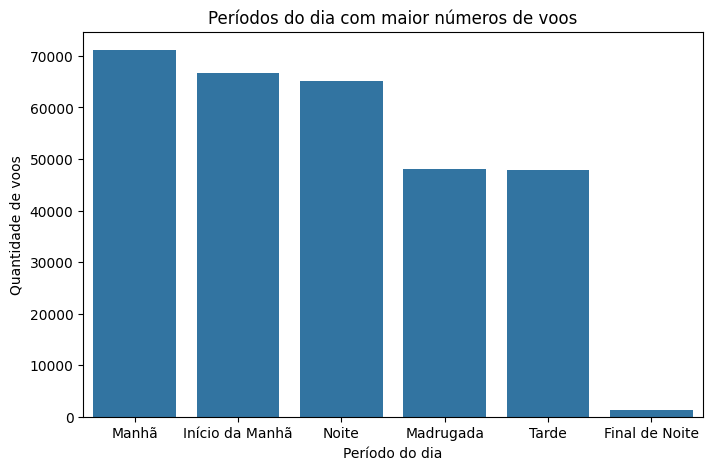

In [50]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['horario_partida'].value_counts().index, y=df['horario_partida'].value_counts().values)
plt.title('Períodos do dia com maior números de voos')
plt.xlabel('Período do dia')
plt.ylabel('Quantidade de voos')
plt.show()

# 4. Conclusão

O objetivo dessa análise foi compreender os fatores que influenciam o preço de passagens aéreas, avaliando diferenças entre classes, companhias aéreas, horários e rotas.



1. **Como os preços se distribuem?**: Os preços apresentam uma forte assimetria à direita, indicando que a maioria dos voos custa até ~20.000 USD, mas há passagens que ultrapassam dos 100.000 USD. Isso mostra a presença de outliers que distorcem a distribuição.

2. **Há diferença de preço entre classes?**: Sim. A classe executiva tem média de valores significativamente maior do que a classe econômica, além de uma dispersão maior de preços. A classe econômica, por outro lado, concentra valores próximos da média. Isso reforça que a escolha da classe é um dos fatores mais determinantes no preço final.

3. **A duração do voo influencia no preço da passagem?**: Sim, mas de forma moderada. Voos mais longos ou com mais paradas tendem a custar mais, refletindo custos adicionais de operação, como combustível, manutenção e serviços de bordo. No entanto, a duração não é tão decisiva quanto outros fatores, como classe ou antecedência da compra.

4. **O preço varia de acordo com o seu horário?**: Sim. Há diferenças de preço médio entre manhã, tarde, noite e madrugada. Isso reflete tanto a demanda quanto a conveniência: horários mais procurados tendem a ser mais caros, enquanto horários alternativos costumam ter preços mais baixos.

5. **Quais são as rotas mais caras e mais baratas?**: A rota Chennai → Bangalore é a mais cara, principalmente devido ao maior tempo médio de voo em comparação às rotas mais baratas. Já as rotas mais acessíveis costumam ser mais curtas, o que confirma que a duração é um dos principais fatores de impacto no valor da passagem.

6. **A compra com antecedência influencia o preço da passagem**: Sim, este é o fator mais relevante. Quanto mais próxima da data do voo, maior o aumento do preço, e esse crescimento não é linear. Isso confirma a recomendação prática de planejar e comprar passagens com antecedência para economizar.




## Conclusão final

De forma geral, os preços das passagens aéreas são influenciados por múltiplos fatores. Os mais relevantes são a antecedência da compra e a classe escolhida, seguidos pelo horário da viagem. A análise também evidencia a presença de outliers, que elevam artificialmente o valor máximo, mas não refletem a maioria dos casos.
Na prática, isso significa que passageiros podem reduzir custos priorizando planejamento antecipado, escolhendo horários alternativos e, quando possível, optando por rotas mais curtas ou com conexões estratégicas.